<a href="https://colab.research.google.com/github/BJahanyar/Advanced_Python/blob/main/DeapLearning/Assignment_42/Sheykh_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np
import tensorflow as tf
import cv2 
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
width = height = 224

In [4]:
data_generator = ImageDataGenerator(
    rescale = 1 / 255,
)

In [5]:
train = data_generator.flow_from_directory( '/content/drive/MyDrive/DeepLearning/Sheykh_Detection/Sheykh-Recognition',
    target_size = (width, height),
    class_mode = 'categorical',
)

Found 157 images belonging to 2 classes.


In [6]:
input_shape = (224, 224, 3)

model = tf.keras.models.Sequential([
         Conv2D(32, (3, 3), input_shape=input_shape, activation='relu'),
         Conv2D(32, (3, 3), activation='relu'),
         MaxPool2D((2, 2)),
         Conv2D(32, (3, 3), activation='relu'),
         Conv2D(32, (3, 3), activation='relu'),
         MaxPool2D((2, 2)),
         Conv2D(64, (3, 3), activation='relu'),
         Conv2D(64, (3, 3), activation='relu'),
         MaxPool2D((2, 2)),
         Conv2D(64, (3, 3), activation='relu'),
         Conv2D(64, (3, 3), activation='relu'),
         MaxPool2D((2, 2)),
         Conv2D(128, (3, 3), activation='relu'),
         Flatten(),
         Dense(128, activation='relu'),
         Dense(64, activation='relu'),
         Dense(2, activation='softmax')                          
])

model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.binary_crossentropy,
              metrics='accuracy')

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 32)      9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 51, 51, 64)        1

In [8]:
history = model.fit(train, epochs=100)

Epoch 1/100
5/5 [==============================] - 2s 393ms/step - loss: 0.6922 - accuracy: 0.6433
Epoch 2/100
5/5 [==============================] - 2s 433ms/step - loss: 0.6922 - accuracy: 0.5796
Epoch 3/100
5/5 [==============================] - 2s 455ms/step - loss: 0.6922 - accuracy: 0.7006
Epoch 4/100
5/5 [==============================] - 2s 405ms/step - loss: 0.6922 - accuracy: 0.6242
Epoch 5/100
5/5 [==============================] - 2s 389ms/step - loss: 0.6922 - accuracy: 0.5541
Epoch 6/100
5/5 [==============================] - 2s 368ms/step - loss: 0.6921 - accuracy: 0.6497
Epoch 7/100
5/5 [==============================] - 2s 365ms/step - loss: 0.6921 - accuracy: 0.6561
Epoch 8/100
5/5 [==============================] - 2s 389ms/step - loss: 0.6921 - accuracy: 0.6306
Epoch 9/100
5/5 [==============================] - 2s 347ms/step - loss: 0.6921 - accuracy: 0.7580
Epoch 10/100
5/5 [==============================] - 2s 373ms/step - loss: 0.6921 - accuracy: 0.5478
Epoch 11/

In [20]:
img = cv2.imread('/content/drive/MyDrive/DeepLearning/Sheykh_Detection/Sheykh-Recognition/Test/Test.jpg')
img = cv2.resize(img, (width, height))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = np.array(img1)
img = img_np / 255.0
img = img_np.reshape(1, width, height, 3)

TypeError: ignored

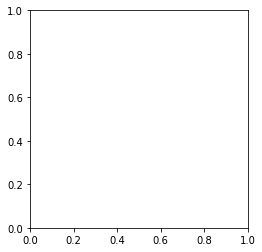

In [23]:
y_pred = model.predict(img_np)
np.argmax(y_pred)